In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [157]:
np.random.seed(170)

In [158]:
sample_data = pd.read_csv("sample_data.csv")

In [159]:
X = sample_data.iloc[:,:-1]
y = sample_data.iloc[:, -1]

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, stratify=y)

# Data Preprocessing

In [161]:
# remove id feature and features that already imply diabetes
diabetes_features = [
    "PUF1Y_ID", "AB111", "AB23_P1", "AB114_P1", "AJ82", "AB22V2", "DIABETES", "AB81", "AB113", 
    "AB112", "AB51_P1", "AB110_P", "AB109", "AB24", "DIAMED", "AB25", "AB63", "AB27_P1", "AB28_P1",
    "AB26_P1", "DIABCK_P1", "AB27_P", "AJ80", 'AH102_P', 'AH102_P1'
]
similar_features = ["WEIGHK_P", "WGHTK_P", "HEIGHM_P", "HGHTM_P", "WHOBMI"]
remove_features = diabetes_features + similar_features
X_train = X_train.drop(remove_features, axis=1)
X_test = X_test.drop(remove_features, axis=1)

In [162]:
numerical_features = list(set([
    "HHSIZE_P1", "AC46", "AE2", "AE_FRUIT", "AE7", "AE_VEGI", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "LONELINESS", "AH44B", "FAMSIZE2_P1", "INS12M", "AH128", "AH129", "AH132", "AH133", "TCURPLAN", "AH136", "AH5", "AJ93", "AK10_P", "AK10A_P", "POVGWD_P1", "POVLL2_P1V2",
    "HHSIZE_P1", "AC46", "AE2", "AE_FRUIT", "AE_VEGI", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "LONELINESS", "AH44B", "FAMSIZE2_P1", "INS12M", "AH128", "AH129", "AH132", "AH133", "TCURPLAN", "AH136", "AH5", "AJ93", "AK10_P", "AK10A_P", "POVGWD_P1", "POVLL2_P1V2",
    "HHSIZE_P1", "AC100", "AC46", "AC47", "AE2", "AE_FRUIT", "AE3", "AE_FRIES", "AE5", "AE7", "AE_VEGI", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "FAMSIZE2_P1", "INS12M", "AH128", "AH129", "AH132", "AH133", "TCURPLAN", "AH136", "AH5", "AK10_P", "AK10A_P", "POVGWD_P1", "POVLL2_P1V2", "AC146", "AC147", "AC148",
    "HHSIZE_P1", "AD38W", "AD39W", "AD41W", "AD42W", "AC100", "AC11", "AE_SODA", "AC46", "AC47", "AE2", "AE_FRUIT", "AE3", "AE_FRIES", "AE5", "AE7", "AE_VEGI", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "FAMSIZE2_P1", "INS12M", "AH128", "AH132", "AH133", "TCURPLAN", "AH136", "AH5", "AK10_P", "AK10A_P", "POVGWD_P1", "POVLL2_P1V2",
    "HHSIZE_P1", "DIABCK_P1", "AB26_P1", "AD38W", "AD39W", "AD41W", "AD42W", "AC11", "AE_SODA", "AC31", "AC31_P1", "AC111", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "FAMSIZE2_P1", "INS12M", "AK3_P1", "AK7_P1", "AK10_P", "AK10A_P", "POVGWD_P", "POVLL2_P1",
    "HHSIZE_P1", "DIABCK_P1", "AB26_P1", "AD38W", "AD39W", "AD41W", "AD42W", "AC11", "AE_SODA", "AC31", "AC31_P1", "AC46", "AC47", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "FAMSIZE2_P1", "INS12M", "AK3_P1", "AK7_P1", "AK10_P", "AK10A_P", "AK22_P", "POVGWD_P", "POVLL2_P",
    "HHSIZE_P1", "DIABCK_P1", "AB26", "AD41W", "AD42W", "AC11", "AE_SODA", "AC31_P1", "AC46", "AC47_P1", "AC48_P1", "AC52_P1", "AC59", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "FAMSIZE2_P1", "INS12M", "AH102_P1", "AK7_P1", "AK10_P", "AK10A_P", "AK22_P", "POVGWD_P",
    "HHSIZE_P1", "DIABCK_P1", "AB26", "AD41W", "AD42W", "AC11", "AE_SODA", "AC31_P1", "AC46", "AC47_P1", "AC48_P1", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "BMI_P", "DISTRESS", "DSTRS_P1", "DSTRSYR", "FAMSIZE2_P1", "SERVED", "INS12M", "AH102_P1", "AK7_P1", "AK10_P", "AK10A_P", "AK22_P", "AK33_P1", "POVGWD_P",
    "HHSIZE_P1", "AD38W_P1", "AD39W", "AD41W", "AD42W", "AE2", "AE3", "AE7", "AE_FRIES", "AE_FRUIT", "AC11", "AE_SODA", "AE_VEGI", "AC31_P1", "HGHTI_P", "HGHTM_P", "HEIGHM_P", "WEIGHK_P", "WGHTK_P", "WGHTP_P", "WT18K_P", "WT18P_P", "BMI_P", "DSTRS_P1", "DSTRSYR", "INS12M", "AH102_P1", "AK10_P", "AK10A_P", "AK22_P", "POVGWD_P"
]))

In [163]:
features = ['AK3_P1', 'HGHTM_P', 'POVLL2_P1', 'AD38W_P1', 'DIABCK_P1', 'POVLL2_P', 'AB26', 'WEIGHK_P', 'AK33_P1', 'HEIGHM_P', 'WGHTK_P', 'AC47_P1', 'AB26_P1', 'POVGWD_P', 'AH102_P1']

for i in features:
    if i in numerical_features:
        numerical_features.remove(i)

In [164]:
categorical_features = X_train.drop(numerical_features, axis=1)
categorical_features = categorical_features.columns

In [165]:
# fill the numerical features with the median in the training set
for col in numerical_features:
    X_train[col] = X_train[col].fillna(X_train[col].median())

In [166]:
# fill the numerical features with the median in the test data
for col in numerical_features:
    X_test[col] = X_test[col].fillna(X_train[col].median())

In [167]:
# fill in the categorical features with the mode
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
X_train[:] = imputer.fit_transform(X_train)
X_test[:] = imputer.transform(X_test)

# Feature Selection

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
model = RandomForestClassifier()
sel = SelectFromModel(model)
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

257
Index(['AA5C', 'AB1', 'AB117', 'AB118', 'AB16', 'AB29V2', 'AB30', 'AB34',
       'AB43', 'AB52',
       ...
       'AJ175_P1', 'AK7_P1V2', 'AC116_P1', 'AH129', 'AC146', 'AC160', 'AC161',
       'AG44', 'AM44', 'AM45'],
      dtype='object', length=257)


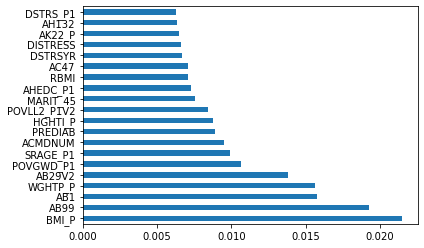

In [169]:
model.fit(X_train, y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Hypothesis Testing

In [170]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
sel2 = SelectFromModel(xgb_model)
sel2.fit(X_train, y_train)
selected_feat2 = X_train.columns[(sel2.get_support())]
print(selected_feat2)

Index(['AA5C', 'AB1', 'AB115', 'AB119', 'AB16', 'AB17', 'AB18', 'AB19',
       'AB29V2', 'AB30',
       ...
       'VOTE_RSNNO', 'AJ115_P1', 'INTV_MODE2', 'AJ153V2_12', 'AJ194_6',
       'AJ194_7', 'AJ200_9', 'AL91_1', 'AH53', 'AI37'],
      dtype='object', length=320)


# XGBoost

In [171]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

In [172]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, roc_curve, auc
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
print(confusion_matrix(y_test, y_pred))
print('=================================================')
print(f'Kappa Score: {cohen_kappa_score(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'AUC Score: {roc_auc_score(y_test, y_prob)}')
print('=================================================')

[[2340   45]
 [ 238   44]]
Kappa Score: 0.19643102396458478
Accuracy Score: 0.8938882639670042
Precision: 0.4943820224719101
Recall: 0.15602836879432624
F1 Score: 0.23719676549865232
AUC Score: 0.861150512214342


In [173]:
scoring = ['accuracy', 'precision', 'recall', 'f1_micro', 'roc_auc']
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

results = cross_validate(xgb, X_train, y_train, scoring=scoring, cv=cv)
print('=================================================')
print(f"Average Accuracy Score: {np.mean(results['test_accuracy'])}")
print(f"Average Precision Score: {np.mean(results['test_precision'])}")
print(f"Average Recall Score: {np.mean(results['test_recall'])}")
print(f"Average F1 Score: {np.mean(results['test_f1_micro'])}")
print(f"Average AUC Score: {np.mean(results['test_roc_auc'])}")
print('=================================================')

Average Accuracy Score: 0.8906935781712058
Average Precision Score: 0.451473354231975
Average Recall Score: 0.16856349757113115
Average F1 Score: 0.8906935781712058
Average AUC Score: 0.8469835791900963
